In [1]:
# This Notebook was used to create the visuals for COVID deaths and infections when compared to population density, for our first
# ten countries of interest.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
infections_df = pd.read_csv("Data/Cleaned/infections_cleaned.csv")
deaths_df = pd.read_csv("Data/Cleaned/deaths_cleaned2.csv")
cia_df = pd.read_csv("Data/Cleaned/cia_simplified.csv")

In [3]:
infections_df.head()

,Date,Austria,Italy,Portugal,Greece,Taiwan*,Indonesia,India,Mexico,Thailand,Iran
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
deaths_df.head()

,Date,Austria,Italy,Portugal,Greece,Taiwan*,Indonesia,India,Mexico,Thailand,Iran
0,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
cia_df.head()

,country,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave
0,Austria,0.104,5.29,7.3,83871.0,54333.0,445.0,8.913088e+06,483.0
1,Greece,0.078,6.31,4.2,131957.0,28733.0,210.0,1.053387e+07,308.0
2,India,0.030,0.74,0.5,3287263.0,6433.0,2836.0,1.389637e+09,8812.0
3,Indonesia,0.029,0.62,1.0,1904569.0,11533.0,1120.0,2.773292e+08,3175.0
4,Iran,0.067,1.58,1.6,1648195.0,12767.0,581.0,8.675830e+07,1033.0


In [6]:
cia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       10 non-null     object 
 1   current_health_expenditure_2019               9 non-null      float64
 2   physicians_density_per_1000_2020_to_2018      9 non-null      float64
 3   Hospital_bed_density_per_1000_2018_to_2017    8 non-null      float64
 4   geography_area_total_sq_km                    10 non-null     float64
 5   real_GDP_per _capita_3year_average_2020_2018  10 non-null     float64
 6   GDP_official_exchange_rate_Billion            10 non-null     float64
 7   Population                                    10 non-null     float64
 8   Real_GDP_purchasing_power_parity_3year_ave    10 non-null     float64
dtypes: float64(8), object(1)
memory usage: 848.0+ bytes


In [7]:
cia_df["pop_density"] = round(cia_df["Population"] / cia_df["geography_area_total_sq_km"])
cia_df

,country,current_health_expenditure_2019,physicians_density_per_1000_2020_to_2018,Hospital_bed_density_per_1000_2018_to_2017,geography_area_total_sq_km,real_GDP_per _capita_3year_average_2020_2018,GDP_official_exchange_rate_Billion,Population,Real_GDP_purchasing_power_parity_3year_ave,pop_density
0,Austria,0.104,5.29,7.3,83871.0,54333.0,445.0,8.913088e+06,483.0,106.0
1,Greece,0.078,6.31,4.2,131957.0,28733.0,210.0,1.053387e+07,308.0,80.0
2,India,0.030,0.74,0.5,3287263.0,6433.0,2836.0,1.389637e+09,8812.0,423.0
3,Indonesia,0.029,0.62,1.0,1904569.0,11533.0,1120.0,2.773292e+08,3175.0,146.0
4,Iran,0.067,1.58,1.6,1648195.0,12767.0,581.0,8.675830e+07,1033.0,53.0
5,Italy,0.087,3.95,3.1,301340.0,41267.0,2003.0,6.109555e+07,2470.0,203.0
6,Mexico,0.054,2.43,1.0,1964375.0,19167.0,1270.0,1.291510e+08,2445.0,66.0
7,Portugal,0.095,5.48,3.5,92090.0,33700.0,238.0,1.024208e+07,347.0,111.0
8,Taiwan,NaN,NaN,NaN,35980.0,32956.0,611.0,2.358071e+07,1128.0,655.0
9,Thailand,0.038,0.95,NaN,513120.0,17967.0,544.0,6.964812e+07,1259.0,136.0


In [8]:
deaths_df2 = pd.read_csv("Data/Cleaned/deaths_totals.csv")
deaths_df3 = deaths_df2.dropna()
deaths_df3

,country,total_deaths
0,Austria,21037
1,Italy,179436
2,Portugal,25290
3,Greece,33750
4,Taiwan,13198
5,Indonesia,158829
6,India,530500
7,Mexico,330424
8,Thailand,32995
9,Iran,144596


In [9]:
infect_totals3 = pd.read_csv("Data/Cleaned/infections_totals.csv")
infect_totals4 = infect_totals3.dropna()
infect_totals4

,country,total_infections
0,Austria,5466250
1,Italy,23642011
2,Portugal,5525459
3,Greece,5188890
4,Taiwan,7887537
5,Indonesia,6521292
6,India,44660579
7,Mexico,7113658
8,Thailand,4695203
9,Iran,7558142


In [10]:
country_stats = cia_df.drop(columns=["current_health_expenditure_2019", "physicians_density_per_1000_2020_to_2018", "Hospital_bed_density_per_1000_2018_to_2017", "real_GDP_per _capita_3year_average_2020_2018", "GDP_official_exchange_rate_Billion", "Real_GDP_purchasing_power_parity_3year_ave"])
country_stats

,country,geography_area_total_sq_km,Population,pop_density
0,Austria,83871.0,8.913088e+06,106.0
1,Greece,131957.0,1.053387e+07,80.0
2,India,3287263.0,1.389637e+09,423.0
3,Indonesia,1904569.0,2.773292e+08,146.0
4,Iran,1648195.0,8.675830e+07,53.0
5,Italy,301340.0,6.109555e+07,203.0
6,Mexico,1964375.0,1.291510e+08,66.0
7,Portugal,92090.0,1.024208e+07,111.0
8,Taiwan,35980.0,2.358071e+07,655.0
9,Thailand,513120.0,6.964812e+07,136.0


In [11]:
covid_both = pd.merge(deaths_df3, infect_totals4, on="country")
covid_both

,country,total_deaths,total_infections
0,Austria,21037,5466250
1,Italy,179436,23642011
2,Portugal,25290,5525459
3,Greece,33750,5188890
4,Taiwan,13198,7887537
5,Indonesia,158829,6521292
6,India,530500,44660579
7,Mexico,330424,7113658
8,Thailand,32995,4695203
9,Iran,144596,7558142


In [12]:
covid_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           10 non-null     object
 1   total_deaths      10 non-null     int64 
 2   total_infections  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [13]:
all_totals = pd.merge(covid_both, country_stats, on="country")
all_totals['total_deaths'] = all_totals['total_deaths'].astype(float)
all_totals['total_infections'] = all_totals['total_infections'].astype(float)
pd.options.display.float_format = '{:,}'.format
all_totals

,country,total_deaths,total_infections,geography_area_total_sq_km,Population,pop_density
0,Austria,"21,037.0","5,466,250.0","83,871.0","8,913,088.0",106.0
1,Italy,"179,436.0","23,642,011.0","301,340.0","61,095,551.0",203.0
2,Portugal,"25,290.0","5,525,459.0","92,090.0","10,242,081.0",111.0
3,Greece,"33,750.0","5,188,890.0","131,957.0","10,533,871.0",80.0
4,Taiwan,"13,198.0","7,887,537.0","35,980.0","23,580,712.0",655.0
5,Indonesia,"158,829.0","6,521,292.0","1,904,569.0","277,329,163.0",146.0
6,India,"530,500.0","44,660,579.0","3,287,263.0","1,389,637,446.0",423.0
7,Mexico,"330,424.0","7,113,658.0","1,964,375.0","129,150,971.0",66.0
8,Thailand,"32,995.0","4,695,203.0","513,120.0","69,648,117.0",136.0
9,Iran,"144,596.0","7,558,142.0","1,648,195.0","86,758,304.0",53.0


In [14]:
all_totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     10 non-null     object 
 1   total_deaths                10 non-null     float64
 2   total_infections            10 non-null     float64
 3   geography_area_total_sq_km  10 non-null     float64
 4   Population                  10 non-null     float64
 5   pop_density                 10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 560.0+ bytes


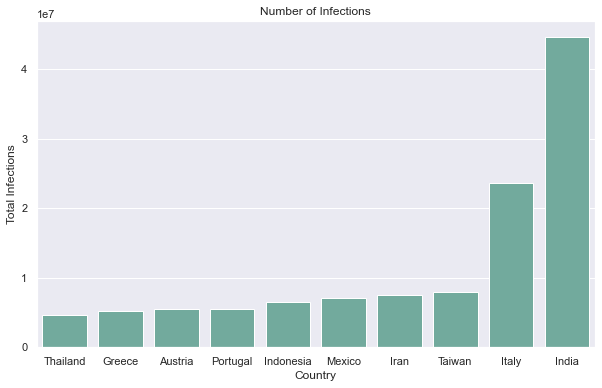

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(data=all_totals.sort_values(["total_infections"], ascending=True), x="country", y="total_infections", color='#69b3a2')
plt.title("Number of Infections")
plt.xlabel('Country')
plt.ylabel('Total Infections')
plt.show()

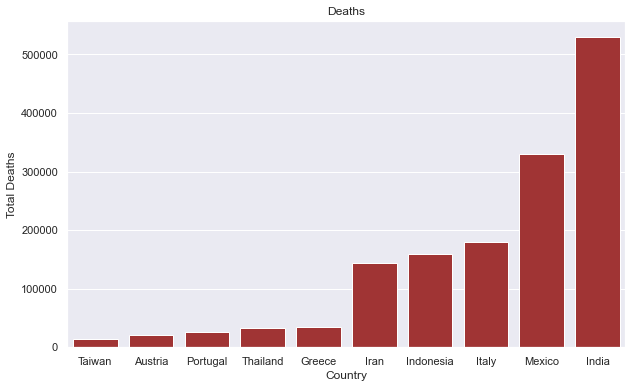

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(data=all_totals.sort_values(["total_deaths"], ascending=True), x="country", y="total_deaths", color='firebrick')
plt.title("Deaths")
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

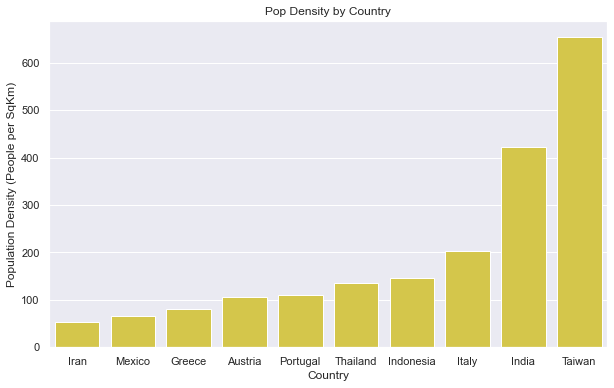

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(data=all_totals.sort_values(["pop_density"], ascending=True), x="country", y="pop_density", color='#ebd834')
plt.title("Pop Density by Country")
plt.xlabel('Country')
plt.ylabel('Population Density (People per SqKm)')
plt.show()

C:\Users\garre\AppData\Local\Temp\ipykernel_11608\3165464771.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
C:\Users\garre\AppData\Local\Temp\ipykernel_11608\3165464771.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])


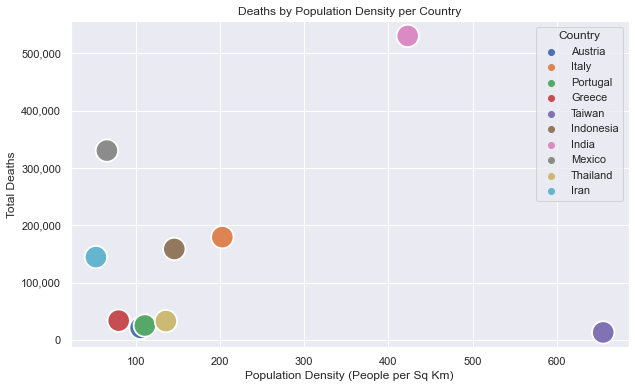

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=all_totals, x="pop_density", y="total_deaths", hue="country", s=500)
plt.title("Deaths by Population Density per Country")
plt.xlabel('Population Density (People per Sq Km)')
plt.ylabel('Total Deaths')
plt.legend(title="Country")
current_values2 = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])
plt.show()

C:\Users\garre\AppData\Local\Temp\ipykernel_11608\517548560.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
C:\Users\garre\AppData\Local\Temp\ipykernel_11608\517548560.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


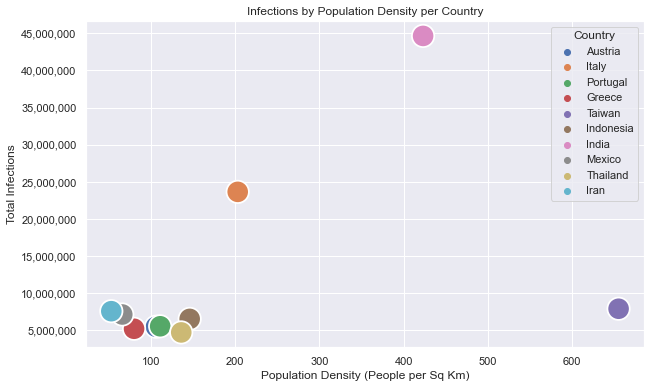

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=all_totals, x="pop_density", y="total_infections", hue="country", s=500)
plt.title("Infections by Population Density per Country")
plt.xlabel('Population Density (People per Sq Km)')
plt.ylabel('Total Infections')
plt.legend(title="Country")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()